# **План**

- Работа с признаками. Предобработка данных на примере задачи классификации
- Задача классификации
    - Классификация данных методом k-ближайших соседей (KNeighborsClassifier)
    - Метрики для задачи классификации: Accuracy, Confusion matrix, Precision, Recall, F1 score, AUC-ROC

- Задача регресии
    - Линейная регрессия (LinearRegression)
    - Метрики для задачи регрессии: Mean Square Error, Mean Absolute Error, R2 score

- Рекомендованная литература

Ноутбук в колаб: https://drive.google.com/file/d/14niD6w38EU_6oc-4rSaePRkHNkKlBur7/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

-------
<h1 align="center"> Работа с признаками </h1> 

# Задача классификации. Предобработка данных
скачайте данные с помощью pd.read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data и уберите заголовок

### **Постановка задачи:** 
Бинарная классификация зарплат (<= 50K, > 50K) по набору признаков, описывающих человека (семейный статус, наличие образования и тд)

In [ ]:
# Считываем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

In [ ]:
df.head(10)

age          workclass  fnlwgt  ... hours-per-week  native-country  salary
0   50   Self-emp-not-inc   83311  ...             13   United-States   <=50K
1   38            Private  215646  ...             40   United-States   <=50K
2   53            Private  234721  ...             40   United-States   <=50K
3   28            Private  338409  ...             40            Cuba   <=50K
4   37            Private  284582  ...             40   United-States   <=50K
5   49            Private  160187  ...             16         Jamaica   <=50K
6   52   Self-emp-not-inc  209642  ...             45   United-States    >50K
7   31            Private   45781  ...             50   United-States    >50K
8   42            Private  159449  ...             40   United-States    >50K
9   37            Private  280464  ...             80   United-States    >50K

[10 rows x 15 columns]

### Перекодировка категориальных признаков

Алгоритмы не могут работать с текстовыми данными без предварительной конвертации в числовой формат.

Работа с категориальными признаками может быть устроена по разному.

В этой задаче предлагается заменить все уникальные значения таких признаков некоторым числовым значением.

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

age  workclass  fnlwgt  ...  hours-per-week  native-country  salary
0   50          6   83311  ...              13              39       0
1   38          4  215646  ...              40              39       0
2   53          4  234721  ...              40              39       0
3   28          4  338409  ...              40               5       0
4   37          4  284582  ...              40              39       0

[5 rows x 15 columns]

In [ ]:
# отображаем его
encoders

{'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'native-country': LabelEncoder(),
 'occupation': LabelEncoder(),
 'race': LabelEncoder(),
 'relationship': LabelEncoder(),
 'salary': LabelEncoder(),
 'sex': LabelEncoder(),
 'workclass': LabelEncoder()}

Посмотрим, во что переведены категориальные признаки

In [ ]:
df.groupby('race').count()[['age']]

age
race                      
 Amer-Indian-Eskimo    311
 Asian-Pac-Islander   1039
 Black                3124
 Other                 271
 White               27815

In [ ]:
encoded_data.groupby('race').count()[['age']]

age
race       
0       311
1      1039
2      3124
3       271
4     27815

In [ ]:
encoders['race'].transform([' Black'])

array([2])

In [ ]:
df.groupby('workclass').count()[['age']]

age
workclass               
 ?                  1836
 Federal-gov         960
 Local-gov          2093
 Never-worked          7
 Private           22696
 Self-emp-inc       1116
 Self-emp-not-inc   2541
 State-gov          1297
 Without-pay          14

In [ ]:
encoded_data.groupby('workclass').count()[['age']]

age
workclass       
0           1836
1            960
2           2093
3              7
4          22696
5           1116
6           2541
7           1297
8             14

### Гистограммы значений
постройте графики гистограмм зависимости различных признаков для того, чтоб оценить корректность данных

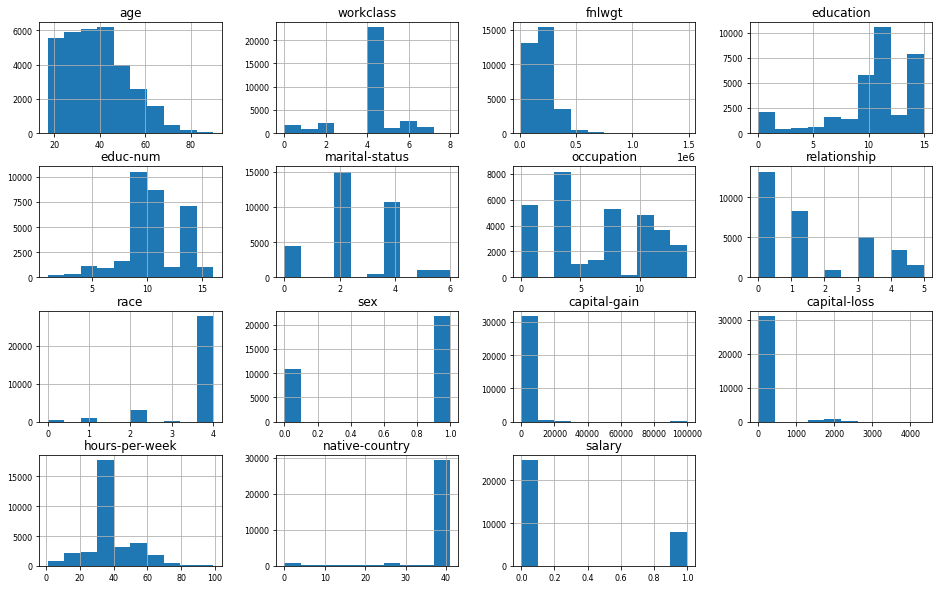

In [ ]:
encoded_data.hist(figsize = (16,10), xlabelsize = 8, ylabelsize = 8)
plt.show()

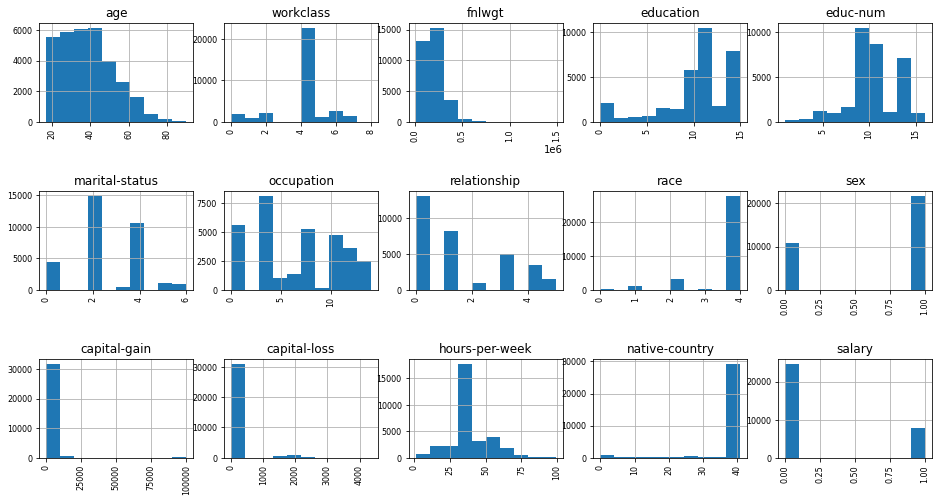

In [ ]:
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax, xlabelsize = 8, ylabelsize = 8)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Матрица корреляций

По тепловой карте можно посмотреть на зависимости между признаками, а также на зависимости между целевой переменной и признаками. 

Значение близкое к нулю не обязательно означает отсутствие зависимости! 

**Вопрос:** Почему так?

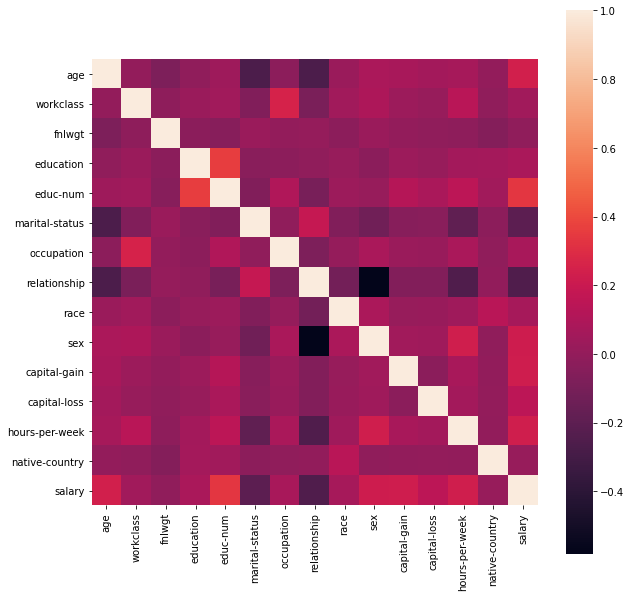

In [ ]:
# тоже крутой модуль, для различной визуализации данных
import seaborn as sns

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

В данном датасете пропущенные значения обозначены как " ?".  Удалим из выборки все объекты с пропусками.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educ-num        32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# удалим все объекты, в которых содержатся пропуски
df = df.dropna()
df.count()

age               32560
workclass         32560
fnlwgt            32560
education         32560
educ-num          32560
marital-status    32560
occupation        32560
relationship      32560
race              32560
sex               32560
capital-gain      32560
capital-loss      32560
hours-per-week    32560
native-country    32560
salary            32560
dtype: int64

In [ ]:
df.groupby('salary').count()[['age']]

age
salary       
 <=50K  24719
 >50K    7841

Будем предсказывать salary (> или < 50к в год - бинарная классификация)

In [ ]:
X = encoded_data.drop('salary', axis =1) #np.array(df_prc[df._get_numeric_data().columns])
# y = np.array(df_prc['salary'], dtype='int')
y = encoders['salary'].transform(df['salary']) # применяем наши кодировщики к категориальным фичам

In [ ]:
X

age  workclass  fnlwgt  ...  capital-loss  hours-per-week  native-country
0       50          6   83311  ...             0              13              39
1       38          4  215646  ...             0              40              39
2       53          4  234721  ...             0              40              39
3       28          4  338409  ...             0              40               5
4       37          4  284582  ...             0              40              39
...    ...        ...     ...  ...           ...             ...             ...
32555   27          4  257302  ...             0              38              39
32556   40          4  154374  ...             0              40              39
32557   58          4  151910  ...             0              40              39
32558   22          4  201490  ...             0              20              39
32559   52          5  287927  ...             0              40              39

[32560 rows x 14 columns]

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

------------------------------
## Масштабирование признаков

В качестве классификатора используем kNN, признаки: число соседей (*n_neighbors*) и метрика (*metrics*).

Подберём оптимальные значения указанных гиперпараметров

In [ ]:
# Будем использовать модель k ближайших соседей, которую проходили на 5 занятии
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Для получения более точной оценки нашего алгоритма будем использовать [кросс-валидацию](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F)

Результаты тестов на каждом проходе (fold) усредним

![alt text](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

### Подбор параметра n_neighbors для KNeighborsClassifier

У алгоритма knn есть один гиперпараметр (то значение, которое мы выставляем руками) -- число соседей на основе которых алгоритм принимает решение.

Как обсуждалось на лекции, подбор подобных параметров можно осуществлять на основе специальной отложенной (тестовой) выборки, а можно с помощью кросс-валидации. (Вспомните, какие плюсы и минусы имеет каждый из подходов)

В данной задаче мы будем использовать кросс-валидацию на 5 фолдах.

In [ ]:
np.array(np.linspace(1, 100, 10), dtype='int')

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [ ]:
# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(25, 35, 10), dtype='int')} #,
            # 'metric': ['EuclideanDistance', 'ManhattanDistance']} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=3)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 35])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Функция отрисовки графиков

def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

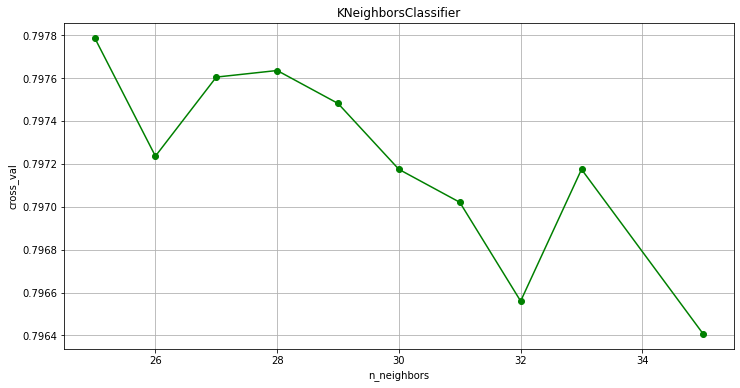

In [ ]:
# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [ ]:
# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': np.array(np.linspace(15, 35, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=5)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 29}, 0.7987407862407864)

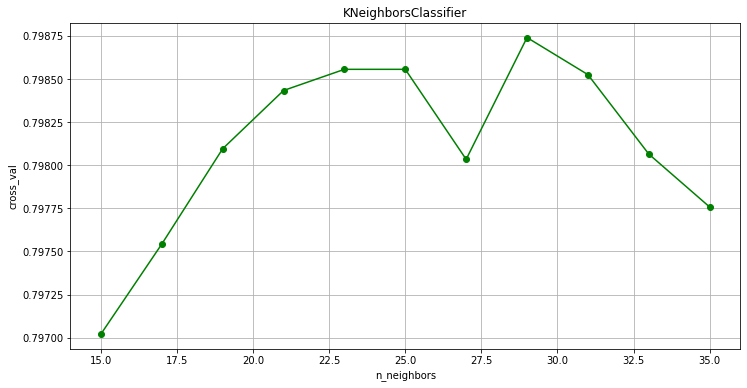

In [ ]:
# отобразим результат по аналогии
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

In [ ]:
(X - X.mean(axis=0))/X.std(axis=0)

age  workclass  ...  hours-per-week  native-country
0      0.837084   1.463861  ...       -2.222086        0.291569
1     -0.042640   0.090120  ...       -0.035429        0.291569
2      1.057015   0.090120  ...       -0.035429        0.291569
3     -0.775743   0.090120  ...       -0.035429       -4.054094
4     -0.115950   0.090120  ...       -0.035429        0.291569
...         ...        ...  ...             ...             ...
32555 -0.849053   0.090120  ...       -0.197404        0.291569
32556  0.103981   0.090120  ...       -0.035429        0.291569
32557  1.423567   0.090120  ...       -0.035429        0.291569
32558 -1.215605   0.090120  ...       -1.655175        0.291569
32559  0.983705   0.776991  ...       -0.035429        0.291569

[32560 rows x 14 columns]

In [ ]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [ ]:
X_scaled

array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999],
       ...,
       [ 1.42358875, -0.3588108 , -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [-1.21562378,  0.11092744, -0.42002663, -0.14591373, -0.21666301,
        -1.65520046],
       [ 0.98372   ,  0.92986178, -0.42002663,  1.88840054, -0.21666301,
        -0.03542999]])

### Подборка параметра n_neighbors для KNeighborsClassifier при нормированных признаках

зачем нормализовывать?
см. [пункт нормализация](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9)

{'n_neighbors': 23} 0.8367323279087747


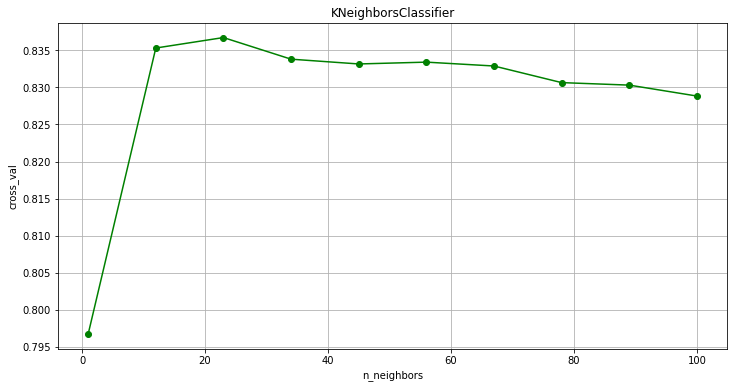

In [ ]:
# обучение идентично предыдущим, но в этот раз нормированные значения
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=3)
gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'],
          gs.cv_results_['mean_test_score'],
          'n_neighbors', 'KNeighborsClassifier')

<h1 align="center"> Метрики </h1> 

# Метрики для задачи классификации

[ВАЖНО](https://habr.com/ru/company/ods/blog/328372/) прочесть

### Accuracy

Не подходит для несбалансированных классов. 

Пускай имеем задачу кредитного скоринга: 100 людей, 10 из них ненадежные заемщики и выдача кредита им принесет убытки. Accuracy будет 90/100 = 90%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_tain, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Используем 2 классификаторва 
- умный kNN
- глупый -- DummyClassifier (самый популярный класс)

In [ ]:
from sklearn import dummy

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=59) 
# тренируем для knn и для dummy
clf_knn = knn.fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [ ]:
# получаем от них предикты
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [ ]:
# ответы knn
y_knn

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# реальные ответы
y_test

array([0, 0, 1, ..., 0, 1, 0])

### Accuracy

$$Accuracy = \frac{\sum_{x_i, y_i \in (X, Y)} I(y(x_i) = y_i)}{|(X, Y)|} = \frac{num~right~classified~obj}{num~all~obj}$$

In [ ]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), 'mp =', metrics.accuracy_score(y_test, y_mp))

knn = 0.7891112145183806 mp = 0.7553280595625872


### Conf-matrix

[[8099   17]
 [2249  380]]


Text(0.5, 42.0, 'Predicted value')

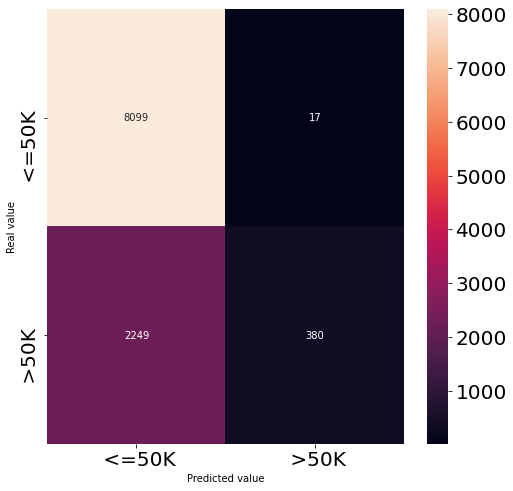

In [ ]:
import matplotlib
import seaborn as sns
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn
# см. https://habr.com/ru/company/ods/blog/328372/

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(nn_mtx)

# font = {'weight' : 'bold', 'size'   :22}
# matplotlib.rc('font', **font)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


[[8116    0]
 [2629    0]]


Text(0.5, 42.0, 'Predicted value')

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


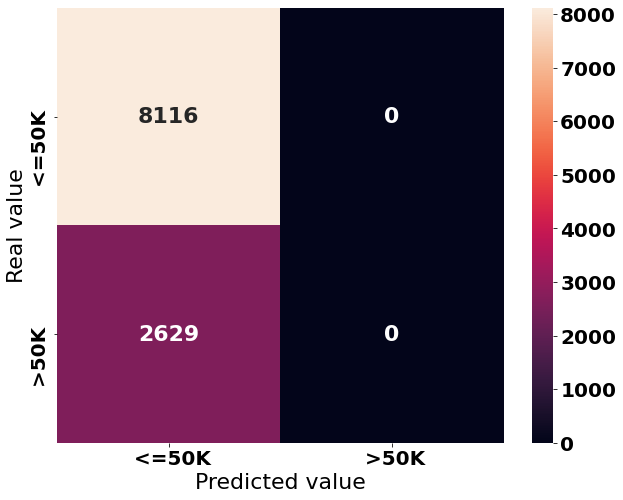

In [ ]:
# по аналогии от dummy

mp_mtx = metrics.confusion_matrix(y_test, y_mp)
print(mp_mtx)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

визуализация precision и recall

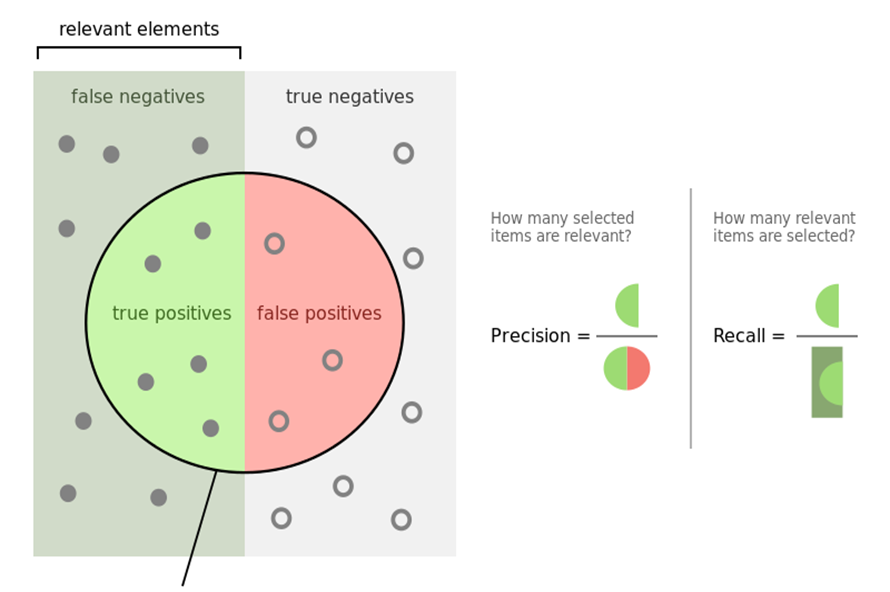

## Precision

$$Precision = \frac{TP}{TP + FP}$$

precision демонстрирует способность отличать этот класс от других классов

In [ ]:
print ('knn =', metrics.precision_score(y_test, y_knn),
       'mp =', metrics.precision_score(y_test, y_mp))

knn = 0.9571788413098237 mp = 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Recall

$$Recall = \frac{TP}{TP + FN}$$

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще

In [ ]:
print ('knn =', metrics.recall_score(y_test, y_knn),
       'mp =', metrics.recall_score(y_test, y_mp))

knn = 0.14454165081780146 mp = 0.0


In [ ]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8116
           1       0.96      0.14      0.25      2629

    accuracy                           0.79     10745
   macro avg       0.87      0.57      0.56     10745
weighted avg       0.83      0.79      0.72     10745



## F1

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

* Как взвесить Precision и Recall?
    - Среднее арифметичиское плохо: (p=0.5, r=0.5) должно быть лучше чем (p=1, r=0), 
    - Лучше минимум, но при равной точности должен побеждать классфикатор с большей полнотой
    - Гармоничиское среднее, сглаженный минимум

In [ ]:
print ('knn =', metrics.f1_score(y_test, y_knn),
       'mp =', metrics.f1_score(y_test, y_mp))

knn = 0.25115664243225383 mp = 0.0


## <span style="color:orange"> Multiclass Precision-Recall </span>

#### Загрузим датасет с тремя классами

In [ ]:
print(sns.get_dataset_names())
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)
df_iris.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


sepal_length  sepal_width  petal_length  petal_width     species
95            5.7          3.0           4.2          1.2  versicolor
82            5.8          2.7           3.9          1.2  versicolor
114           5.8          2.8           5.1          2.4   virginica
92            5.8          2.6           4.0          1.2  versicolor
13            4.3          3.0           1.1          0.1      setosa

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


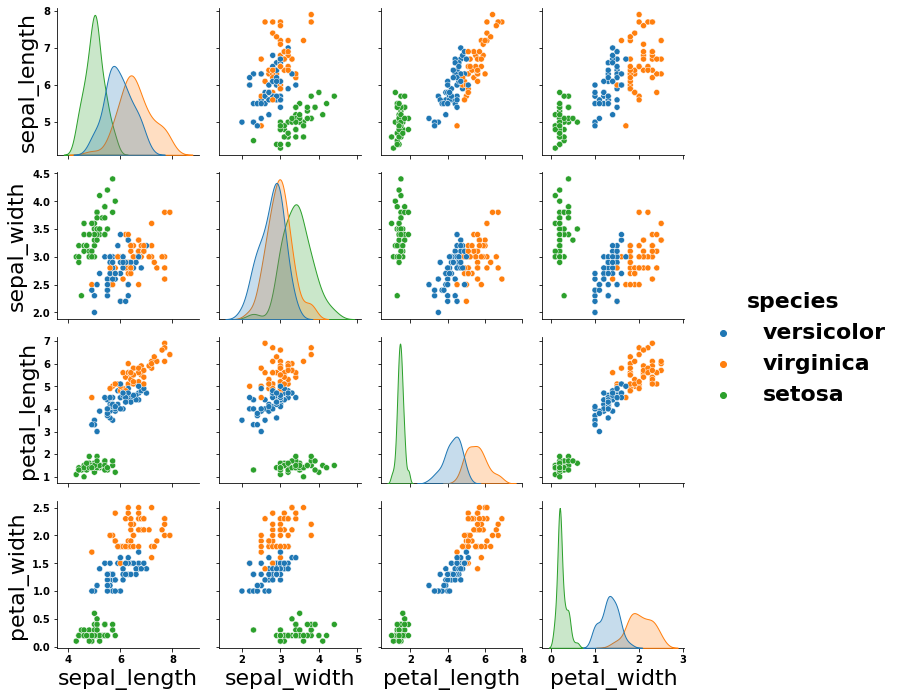

In [ ]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

[Датасет ириса](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [ ]:
# закодируем значения
df_iris, encoders = number_encode_features(df_iris)
# выбросим колонку, которую будем предсказывать
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

# разделим на train test слайсингом
iris_X_train, iris_y_tain = iris_X[:30], iris_y[:30]
iris_X_test, iris_y_test = iris_X[40:], iris_y[40:]

In [ ]:
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width  species
132           6.4          2.8           5.6          2.2        2
24            4.8          3.4           1.9          0.2        0
130           7.4          2.8           6.1          1.9        2
82            5.8          2.7           3.9          1.2        1
26            5.0          3.4           1.6          0.4        0

In [ ]:
# KNN и dummpy классификаторы на датасете
iris_clf_knn = KNeighborsClassifier().fit(iris_X_train, iris_y_tain)
iris_clf_mp = dummy.DummyClassifier("most_frequent").fit(iris_X_train, iris_y_tain)

In [ ]:
# предсказываем
iris_y_knn = iris_clf_knn.predict(iris_X_test)
iris_y_mp = iris_clf_mp.predict(iris_X_test)

Пусть выборка состоит из K классов. Рассмотрим K двухклассовых задач, каждая из которых заключается в отделении своего класса от остальных, то есть целевые значения для k-й задаче вычисляются как $y_{ik} = [yi = k]$. Для каждой из них можно вычислить различные характеристики (TP, FP, и т.д.) алгоритма $a_k(x) = [a(x) = k]$.

Text(0.5, 46.0, 'Predicted value')

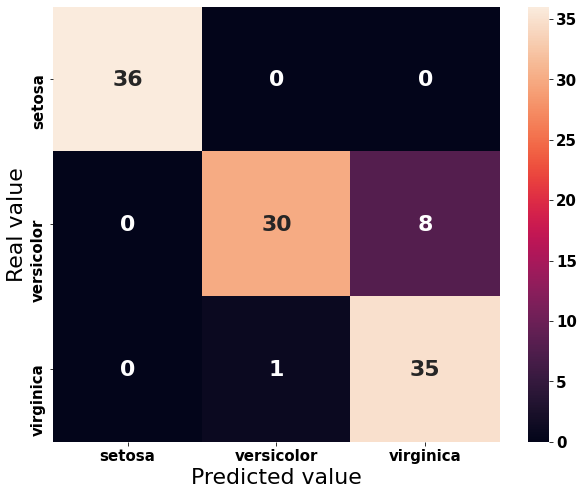

In [ ]:
mp_mtx = metrics.confusion_matrix(iris_y_test, iris_y_knn)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["species"].classes_, 
            yticklabels=encoders["species"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**Macro-averaging** -- подсчет TP, FN, TN, FP для каждого класса, а после подсчет точности и полноты.

**Micro-averaging** -- подсчет  точности и полноты для каждого класса, а после подсчет их среденего.

In [ ]:
print('для kNN:')
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

# 
print('\nдля dummy-classifier:')
iris_y_knn[iris_y_knn==1] = 0
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

для kNN:
macro =  0.9185470555861309 , micro =  0.9181818181818182

для dummy-classifier:
macro =  0.5283683585268936 , micro =  0.6454545454545455


## AUC-ROC

[ВАЖНО](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/) прочесть

И посмотреть:

https://www.youtube.com/watch?v=V31tK9CgI6c

ROC-кривая - график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила. (ред.)
 
Количественную интерпретацию ROC даёт показатель AUC (Area Under Curve)

Пример хорошего классификатора:

![image.png](https://miro.medium.com/max/1056/1*Uu-t4pOotRQFoyrfqEvIEg.png)

![image.png](https://miro.medium.com/max/730/1*-tPXUvvNIZDbqXP0qqYNuQ.png)

Пример рандомного классификатора:

![image.png](https://miro.medium.com/max/1014/1*yF8hvKR9eNfqqej2JnVKzg.png)

![image.png](https://miro.medium.com/max/730/1*k_MPO2Q9bLNH9k4Wlk6v_g.png)

In [ ]:
# по аналогии возьмем knn и dummpy
clf_knn = KNeighborsClassifier(n_neighbors=29).fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [ ]:
# получаем ответы от классификаторов
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

ROC AUC = 0.5892


Text(0.5, 0, 'False Positive Rate')

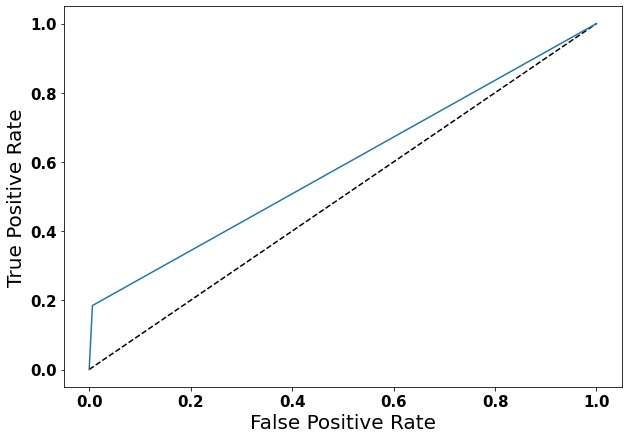

In [ ]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)
fpr, tpr, _ = metrics.roc_curve(y_test, y_knn)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

ROC AUC = 0.5000


Text(0.5, 0, 'False Positive Rate')

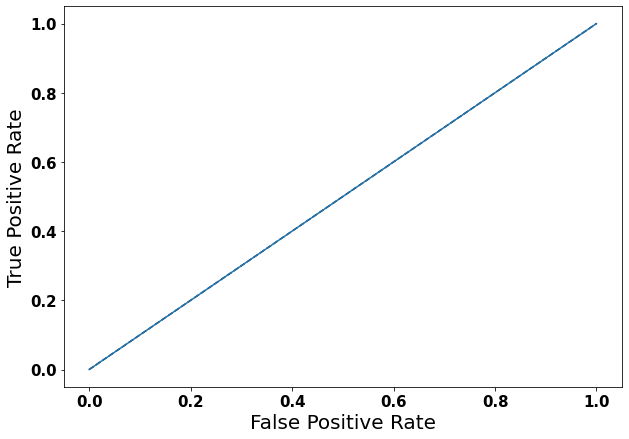

In [ ]:
from matplotlib import pylab
fpr, tpr, _ = metrics.roc_curve(y_test, y_mp)
pylab.figure(figsize=(10, 7))
pylab.plot([0, 1], [0, 1], 'k--')
pylab.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

# Задача регрессии

### **Постановка задачи:** 
Определение оценки Вина (оценки от 1 до 10) по набору признаков: кислотность, наличие сахара и тд. Оценки были выставлены экспертами (сомелье), наша задача - предсказать эту оценку, зная характеристики вина.

Data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', header=0, sep=';')

In [ ]:
# будем предсказывать столбец quality (качество) вина по всем параметрам с помощью линейных методов и dummy
df.head(5)

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ceee621d0>,
      dtype=object)

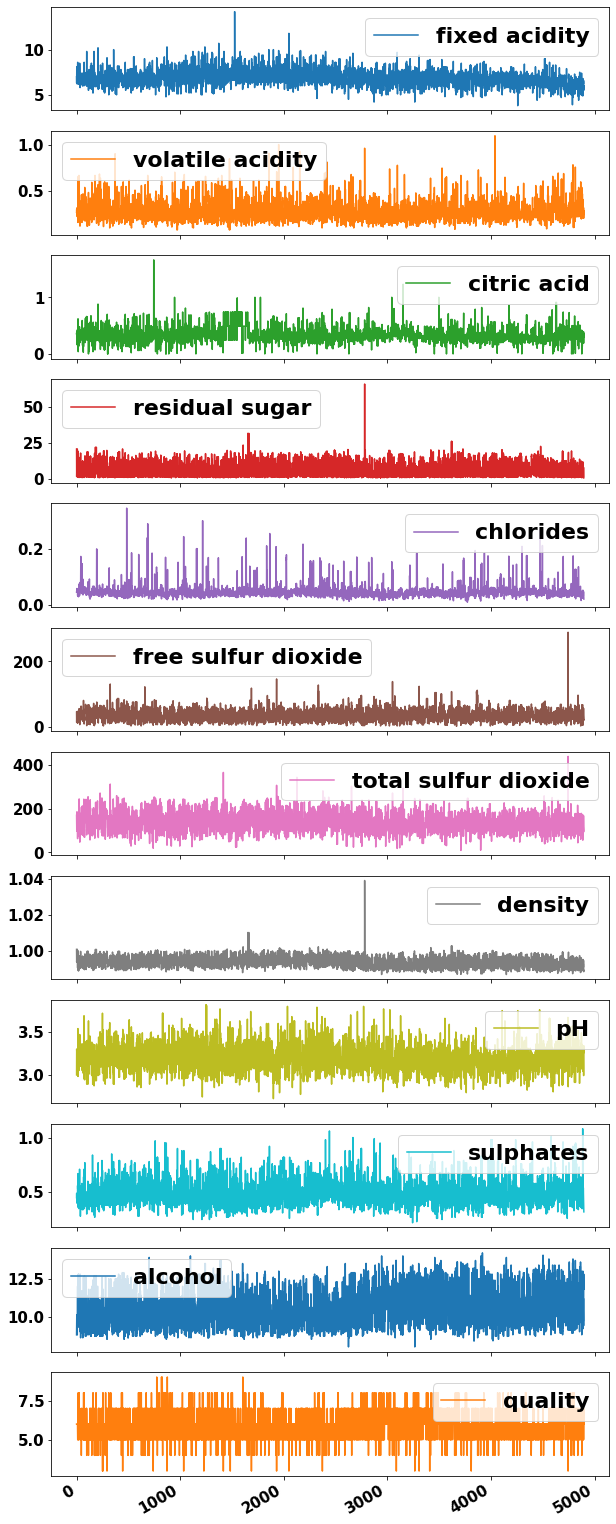

In [ ]:
# df['alcohol'].plot(marker='*',style=' ', color='green')
# df['alcohol'] = df[df['alcohol'] < 15]
df.plot(subplots=True, figsize=(10, 30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ceea6c6d0>,
      dtype=object)

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


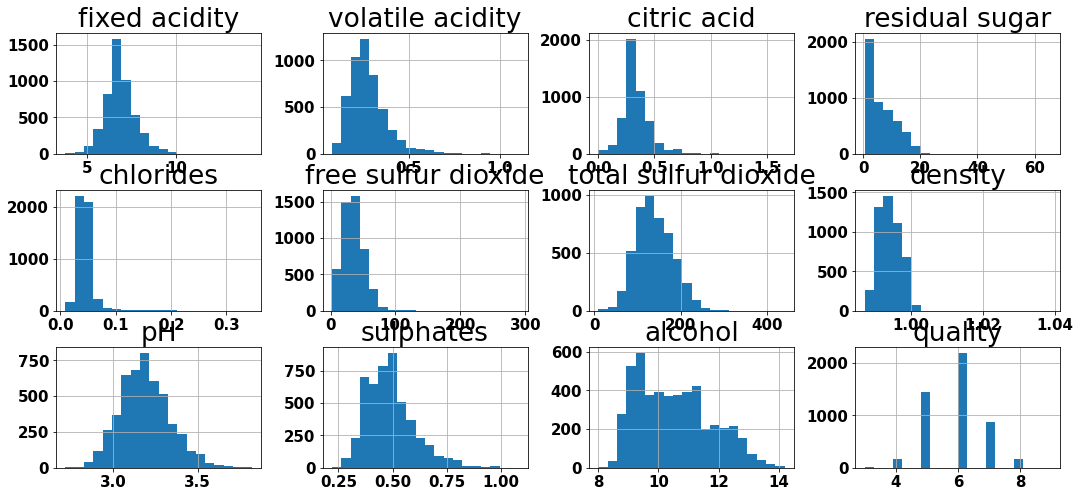

In [ ]:
# строим гистограммы быстрее, чем в начале занятия
df.hist(figsize=(18, 8), layout=(3,4), bins=20)

In [ ]:
# разделяем данные, убираем из обучающей ответы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df.quality, test_size=0.33, random_state=42)

In [ ]:
X_train.head()

fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
3167            5.6              0.28         0.40  ...  3.21       0.43     12.1
324             8.3              0.41         0.51  ...  3.02       0.55     11.4
4731            5.3              0.31         0.38  ...  3.34       0.46     11.7
2305            7.0              0.36         0.30  ...  3.33       0.42     12.2
1777            6.5              0.18         0.26  ...  3.34       0.72      9.5

[5 rows x 11 columns]

In [ ]:
# качество вынесли в отдельную y
y_train.head()

3167    7
324     5
4731    6
2305    7
1777    6
Name: quality, dtype: int64

In [ ]:
# размеры обучающей и тестовой
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(3281, 11) (1617, 11)
(3281,) (1617,)


In [ ]:
from sklearn import linear_model

# линейный классификатор
regr = linear_model.LinearRegression()

# обучаем
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# dummy классификатор
from sklearn import dummy

d_regr = dummy.DummyRegressor(strategy='mean')

# обучаем
d_regr.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [ ]:
# получаем предсказания от двух
predictions = regr.predict(X_test)

In [ ]:
d_predictions = d_regr.predict(X_test)

In [ ]:
# для всех вин имеем предсказания от линейного и dummy, отобразим первые 5
print (predictions.shape, '\t', predictions[0:5])

(1617,) 	 [6.37886848 6.3994996  6.40362171 5.82459689 6.45383134]


In [ ]:
print (d_predictions.shape, '\t', d_predictions[0:5])

(1617,) 	 [5.86863761 5.86863761 5.86863761 5.86863761 5.86863761]


(array([ 1.,  0.,  0.,  0.,  3.,  1.,  3.,  5.,  6.,  3.,  9.,  5., 10.,
         9., 10., 24., 40., 49., 40., 51., 60., 88., 70., 82., 86., 66.,
        84., 67., 70., 65., 87., 71., 66., 67., 62., 49., 49., 40., 30.,
        18., 24., 10., 20.,  4.,  3.,  6.,  3.,  0.,  0.,  1.]),
 array([4.1477337 , 4.21105059, 4.27436748, 4.33768437, 4.40100125,
        4.46431814, 4.52763503, 4.59095192, 4.6542688 , 4.71758569,
        4.78090258, 4.84421947, 4.90753636, 4.97085324, 5.03417013,
        5.09748702, 5.16080391, 5.22412079, 5.28743768, 5.35075457,
        5.41407146, 5.47738834, 5.54070523, 5.60402212, 5.66733901,
        5.73065589, 5.79397278, 5.85728967, 5.92060656, 5.98392345,
        6.04724033, 6.11055722, 6.17387411, 6.237191  , 6.30050788,
        6.36382477, 6.42714166, 6.49045855, 6.55377543, 6.61709232,
        6.68040921, 6.7437261 , 6.80704299, 6.87035987, 6.93367676,
        6.99699365, 7.06031054, 7.12362742, 7.18694431, 7.2502612 ,
        7.31357809]),
 <a list of 50

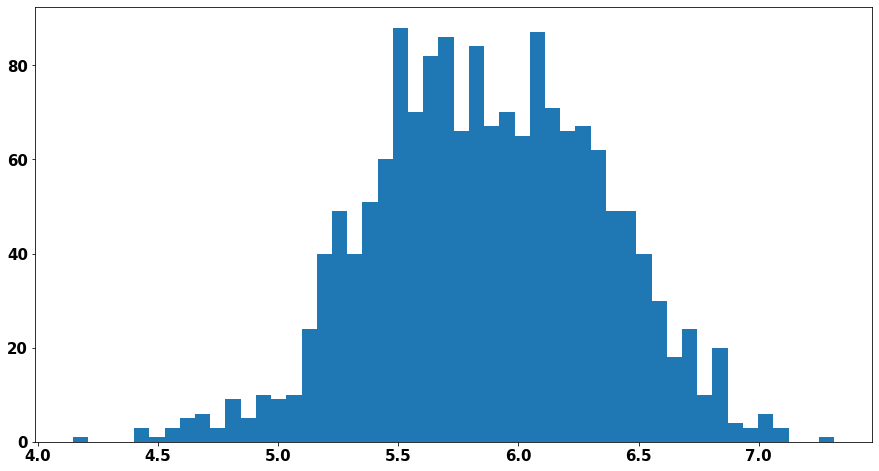

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.hist(predictions, bins=50)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_odno = X_test.values[12]
X_odno

array([6.300e+00, 1.200e-01, 3.600e-01, 2.100e+00, 4.400e-02, 4.700e+01,
       1.460e+02, 9.914e-01, 3.270e+00, 7.400e-01, 1.140e+01])

In [ ]:
import numpy as np

regr.predict(np.array([ X_odno ]))

array([6.65034987])

In [ ]:
y_test.values[12]

7

0.7465388196766426

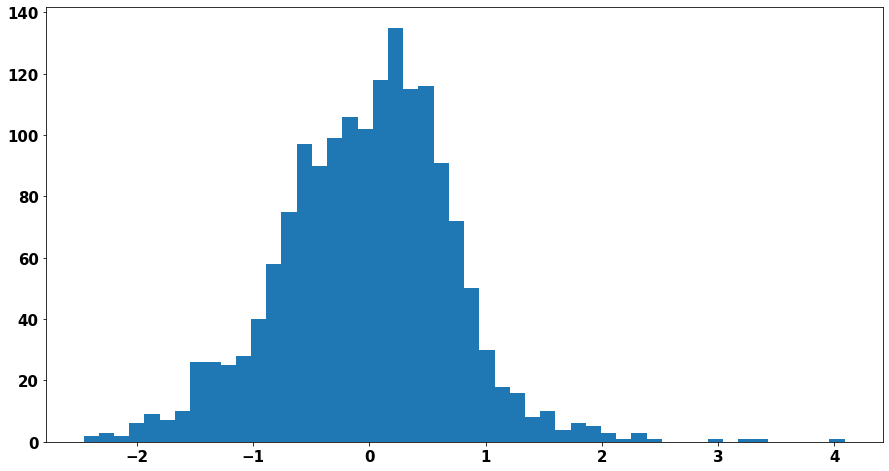

In [ ]:
# отобразим разность предсказаний на гистограмме
rem = predictions - y_test
plt.figure(figsize=(15, 8))
plt.hist(rem, bins=50)
rem.std()

## Метрики для задачи рeгрессии

### Mean Square Error 

## $$ MSE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2 $$

In [ ]:
# см. ссылки выше
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, predictions)
d_mse = metrics.mean_squared_error(y_test, d_predictions)

print ("MSE,  LR = {0:.4}, Dummy = {1:0.4}".format(mse, d_mse))

MSE,  LR = 0.5576, Dummy = 0.7638


In [ ]:
rmse = np.sqrt(mse)
d_rmse = np.sqrt(d_mse)

print( "RMSE / LR = {0:.4}, Dummy = {1:0.4}".format(rmse, d_rmse))

RMSE / LR = 0.7467, Dummy = 0.8739


### Mean Absolute Error 

## $$ MAE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} | y_i - \hat y_i | $$

In [ ]:
mae = metrics.mean_absolute_error(y_test, predictions)
d_mae = metrics.mean_absolute_error(y_test, d_predictions)

print( "MAE / LR = {0:.4}, Dummy = {1:0.4}".format(mae, d_mae))

MAE / LR = 0.5806, Dummy = 0.6663


### Median Absolute Error 

In [ ]:
medae = metrics.median_absolute_error(y_test, predictions)
d_medae = metrics.median_absolute_error(y_test, d_predictions)

print ("MedAE / LR = {0:.4}, Dummy = {1:0.4}".format(medae, d_medae))

MedAE / LR = 0.481, Dummy = 0.8686


### R² score, the coefficient of determination

## $$ R^2(y, \hat y) = 1 -  \frac{\sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2}{\sum_{i=1}^{n_{samples}} {( y_i - \bar y_i )^2}} $$

## $ \bar y = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} y_i $

In [ ]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, predictions)
d_r2 = metrics.r2_score(y_test, d_predictions)

print (f"R2 score / LR = {round(r2, 4)}, Dummy = {round(d_r2, 6)}")

R2 score / LR = 0.2692, Dummy = -0.001034


# Выводы

- Разобрана задача классификации на примере модели KNN
- Часто используемые метрики для задач классификации: Accuracy, Confusion matrix, precision, recall, f1-score, ROC-AUC
- Разобрана задача регрессии на примере линейной регрессии
- Часто используемые метрики для задач регрессии: Mean Square Error, Mean Absolute Error, Median Absolute Error, R2 score

# Рекомендованная литература

- [Линейные модели классификации и регрессии](https://habr.com/ru/company/ods/blog/323890/)

- [О метриках качества в машинном обучении](https://habr.com/ru/company/ods/blog/328372/)

- [Кривые в машинном обучении (ROC-кривая, precision-recall кривая и тд);
](https://dyakonov.org/2019/08/29/кривые-в-машинном-обучении/)
    - [Подробнее про ROC-AUC кривую](https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/)

- [Применение решения задачи: "Определение вероятности невозврата кредита"](https://dyakonov.org/2017/12/25/определение-вероятности-невозврата/)